<a href="https://colab.research.google.com/github/Jaimemorillo/ShouldIwatchThisMovie/blob/master/memoria_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!cp /content/gdrive/MyDrive/methods.py .

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tqdm.notebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import seaborn as sns
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("notebook")

import methods as f

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


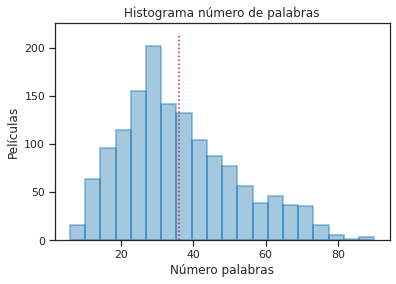

In [ ]:
df = f.read_data("gdrive/My Drive/TFG/overviews_final.csv")
df['overview'] = df['overview'].progress_apply(lambda x: f.preprocessing(x))
X_train, X_test, y_train, y_test = f.split_train_test(df)
X_train, X_test, vocab_size, real_maxlen = f.tokenize(X_train, X_test, 90)

In [ ]:
batch_size = 4
maxlen=90
embedding_dim=64
lr=0.001
epochs=40

In [ ]:
model = f.my_model(maxlen=maxlen, embedding_dim=embedding_dim, vocab_size=vocab_size, lr=lr, epochs=epochs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 90)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 90, 64)            630848    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 90, 32)            6176      
_________________________________________________________________
batch_normalization_5 (Batch (None, 90, 32)            128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 45, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 45, 32)            3104      
_________________________________________________________________
batch_normalization_6 (Batch (None, 45, 32)            128 

In [ ]:
history, model = f.train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size)

Epoch 1/40
358/358 [==============================] - 15s 26ms/step - loss: 0.9558 - accuracy: 0.4971 - val_loss: 0.6898 - val_accuracy: 0.5481
Epoch 2/40
358/358 [==============================] - 8s 23ms/step - loss: 0.8228 - accuracy: 0.4665 - val_loss: 1.2054 - val_accuracy: 0.5481
Epoch 3/40
358/358 [==============================] - 8s 23ms/step - loss: 0.7603 - accuracy: 0.5168 - val_loss: 0.7417 - val_accuracy: 0.5563
Epoch 4/40
358/358 [==============================] - 8s 23ms/step - loss: 0.6965 - accuracy: 0.5580 - val_loss: 0.6948 - val_accuracy: 0.5661
Epoch 5/40
358/358 [==============================] - 8s 23ms/step - loss: 0.7015 - accuracy: 0.5361 - val_loss: 0.6817 - val_accuracy: 0.5759
Epoch 6/40
358/358 [==============================] - 8s 23ms/step - loss: 0.6993 - accuracy: 0.5415 - val_loss: 0.6846 - val_accuracy: 0.5661
Epoch 7/40
358/358 [==============================] - 8s 23ms/step - loss: 0.6779 - accuracy: 0.5706 - val_loss: 0.6839 - val_accuracy: 0.561

Text(25.65, 0.82, '0.87')

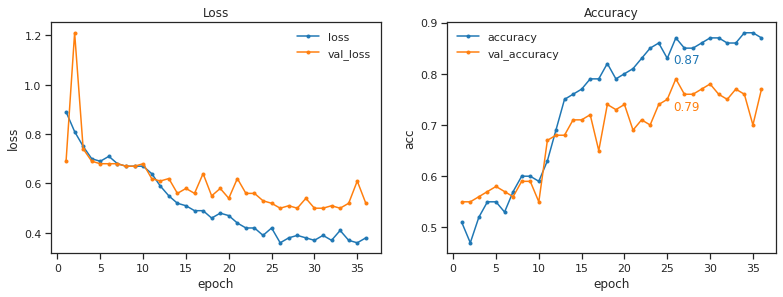

In [ ]:
f.plot_history(history)

In [ ]:
f.plot_metrics(model, X_test, y_test)

Acc: 0.77
Precision: 0.76
Recall: 0.73
F1: 0.74
Conf. Matrix: 
[[274  62]
 [ 76 201]]


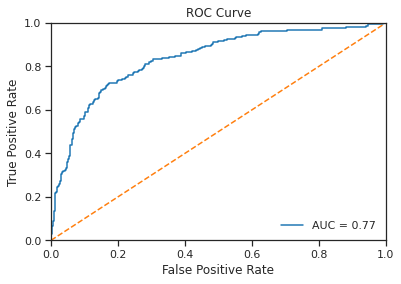

AUC: 0.7706


In [ ]:
f.get_roc_curve(model, X_test, y_test)

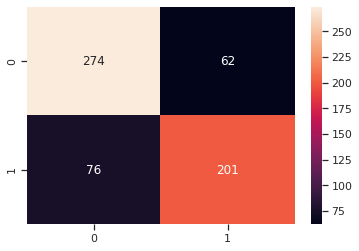

In [ ]:
f.plot_confusion_matrix(model, X_test, y_test)